In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
from scipy.stats import pearsonr

In [6]:
from scipy.stats import chi2_contingency

In [7]:
import statsmodels.api as sm

In [8]:
from notebook.services.config import ConfigManager
cm = ConfigManager().update('notebook', {'limit_output': 20})

In [9]:
animal_data = pd.read_csv('/Users/mickeytessema/Desktop/Data Analysis Portfolio/Biodiversity Project/species_info.csv')

In [10]:
# Inspect Data

In [11]:
print(animal_data.head(10))

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   
5   Mammal         Odocoileus virginianus   
6   Mammal                     Sus scrofa   
7   Mammal                  Canis latrans   
8   Mammal                    Canis lupus   
9   Mammal                    Canis rufus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  
5                                  White-Tailed Deer  

In [12]:
print(animal_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None


In [13]:
print(animal_data.describe())

              category    scientific_name        common_names  \
count             5824               5824                5824   
unique               7               5541                5504   
top     Vascular Plant  Castor canadensis  Brachythecium Moss   
freq              4470                  3                   7   

       conservation_status  
count                  191  
unique                   4  
top     Species of Concern  
freq                   161  


In [14]:
print(len(animal_data))
print(animal_data['scientific_name'].nunique())

5824
5541


In [15]:
print(animal_data['category'].unique())

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [16]:
print(animal_data['scientific_name'].nunique())
print(len(animal_data))
animal_data.drop_duplicates(inplace = True)
animal_data.drop_duplicates(inplace=True, subset='scientific_name', keep='first')
print(len(animal_data))

5541
5824
5541


In [17]:
animal_data.drop(animal_data.index[animal_data['category'] == 'Nonvascular Plant'], inplace=True)
animal_data.drop(animal_data.index[animal_data['category'] == 'Vascular Plant'], inplace=True)
animal_data.reset_index(inplace = True)

In [18]:
null_rows = animal_data[animal_data.isnull().any(axis=1)]
null_count = null_rows.groupby('category').count().reset_index()
print(null_count)
print(len(null_rows))
print(len(animal_data))

    category  index  scientific_name  common_names  conservation_status
0  Amphibian     72               72            72                    0
1       Bird    413              413           413                    0
2       Fish    115              115           115                    0
3     Mammal    146              146           146                    0
4    Reptile     73               73            73                    0
819
946


In [19]:
print(animal_data.groupby('category').count().reset_index())

    category  index  scientific_name  common_names  conservation_status
0  Amphibian     79               79            79                    7
1       Bird    488              488           488                   75
2       Fish    125              125           125                   10
3     Mammal    176              176           176                   30
4    Reptile     78               78            78                    5


In [20]:
null_count['Null Percentages'] = [72/80, 442/521, 116/127, 176/214, 74/79]
for i in null_count['Null Percentages']:
    null_count['Null Percentages'] = i * 100
print(null_count)

    category  index  scientific_name  common_names  conservation_status  \
0  Amphibian     72               72            72                    0   
1       Bird    413              413           413                    0   
2       Fish    115              115           115                    0   
3     Mammal    146              146           146                    0   
4    Reptile     73               73            73                    0   

   Null Percentages  
0         93.670886  
1         93.670886  
2         93.670886  
3         93.670886  
4         93.670886  


In [21]:
animal_data.fillna('No Intervention', inplace = True)

In [22]:
# What is the average number of unique species across all genus’? What genus contains the most unique species? What about the least?

In [23]:
animal_data['animal_genus'] = animal_data['scientific_name'].str.split(expand = True)[0]
animal_data['animal_species'] = animal_data['scientific_name'].str.split(expand = True)[1]
print(animal_data.head())

   index category                scientific_name  \
0      0   Mammal  Clethrionomys gapperi gapperi   
1      1   Mammal                      Bos bison   
2      2   Mammal                     Bos taurus   
3      3   Mammal                     Ovis aries   
4      4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  \
0                           Gapper's Red-Backed Vole     No Intervention   
1                              American Bison, Bison     No Intervention   
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...     No Intervention   
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)     No Intervention   
4                                      Wapiti Or Elk     No Intervention   

    animal_genus animal_species  
0  Clethrionomys        gapperi  
1            Bos          bison  
2            Bos         taurus  
3           Ovis          aries  
4         Cervus        elaphus  


In [24]:
numerator = animal_data.groupby('animal_genus')['scientific_name'].nunique().sum()
denominator = animal_data.animal_genus.nunique()
average_species_per_genus = round(numerator/denominator, 2)
print('The average number of unique species per genus is ' + str(average_species_per_genus) + '.')

The average number of unique species per genus is 2.2.


In [25]:
unique_per_genus = animal_data.groupby('animal_genus')['scientific_name'].nunique().sort_values().reset_index()

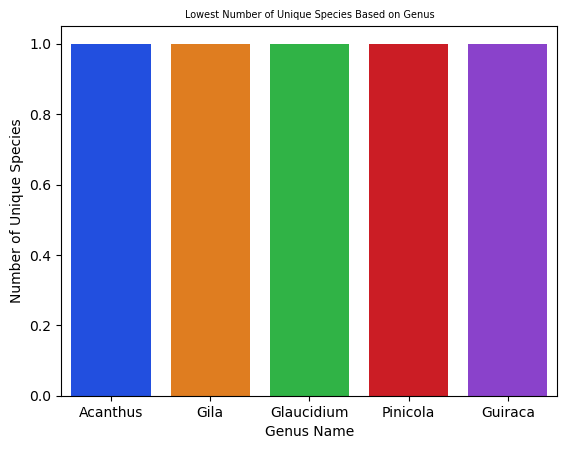

<Figure size 640x480 with 0 Axes>

In [26]:
x_values_min = unique_per_genus.animal_genus[:5]
y_values_min = unique_per_genus.scientific_name[:5]

sns.barplot(x = x_values_min, y = y_values_min, data = unique_per_genus, palette = 'bright')
plt.title('Lowest Number of Unique Species Based on Genus', fontsize = 7)
plt.xlabel('Genus Name')
plt.ylabel('Number of Unique Species')
plt.show()
plt.clf()

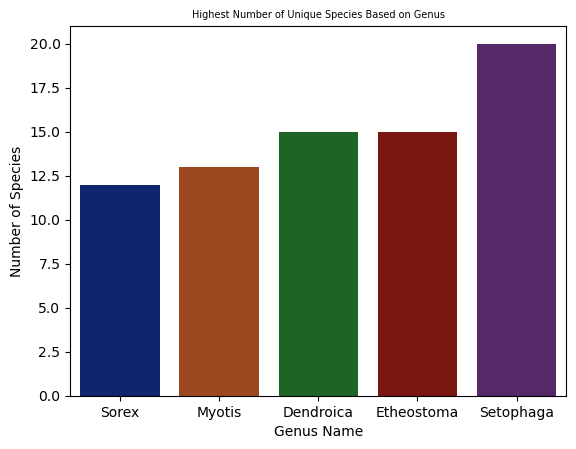

<Figure size 640x480 with 0 Axes>

In [27]:
x_values_max = unique_per_genus.animal_genus[-5:]
y_values_max = unique_per_genus.scientific_name[-5:]
sns.barplot(x = x_values_max, y = y_values_max, data = unique_per_genus, palette = 'dark')
plt.title('Highest Number of Unique Species Based on Genus', fontsize = 7)
plt.xlabel('Genus Name')
plt.ylabel('Number of Species')
plt.show()
plt.clf()

In [28]:
# What is the average number of unique species across all animal types? What animal type contains the most unique species? What about the least?

In [29]:
numerator = animal_data.groupby('category')['scientific_name'].nunique().sum()
denominator = animal_data.category.nunique()
average_species_per_category = round(numerator/denominator, 2)
print('The average number of unique species per animal type is ' + str(average_species_per_category ) + '.')

The average number of unique species per animal type is 189.2.


In [30]:
category_unique_species = animal_data.groupby('category')['scientific_name'].nunique().sort_values().reset_index()
print(category_unique_species)

    category  scientific_name
0    Reptile               78
1  Amphibian               79
2       Fish              125
3     Mammal              176
4       Bird              488


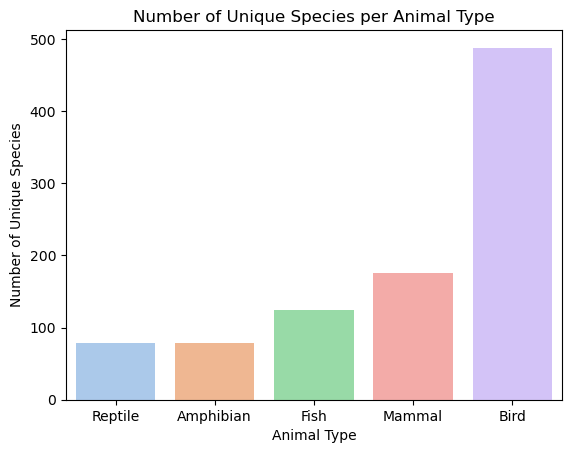

<Figure size 640x480 with 0 Axes>

In [31]:
x_values = category_unique_species.category
y_values = category_unique_species.scientific_name

sns.barplot(x = x_values, y = y_values, data = category_unique_species, palette = 'pastel')
plt.title('Number of Unique Species per Animal Type')
plt.xlabel('Animal Type')
plt.ylabel('Number of Unique Species')
plt.show()
plt.clf()

In [32]:
# Which animal types contain the highest number of unique genus’? Which contain the lowest and what is the average across all animal types?

In [33]:
animal_type_genus = animal_data.groupby('category')['animal_genus'].nunique().sort_values().reset_index()

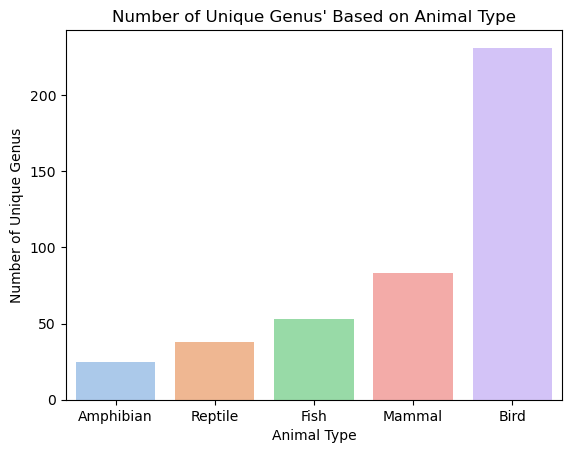

<Figure size 640x480 with 0 Axes>

In [34]:
x_values = animal_type_genus.category
y_values = animal_type_genus.animal_genus
sns.barplot(x = x_values, y = y_values, data = animal_type_genus, palette = 'pastel')
plt.title('Number of Unique Genus\' Based on Animal Type')
plt.xlabel('Animal Type')
plt.ylabel('Number of Unique Genus')
plt.show()
plt.clf()

In [35]:
print('Warning: The following data will attempt to analyze conservation status. However, approximately 94% of entries lack information on conservation status, meaning this analysis is prone to extreme innacuracy.')

In [36]:
animal_data_endangered = animal_data.drop(animal_data.index[animal_data['conservation_status'] == 'No Intervention'])

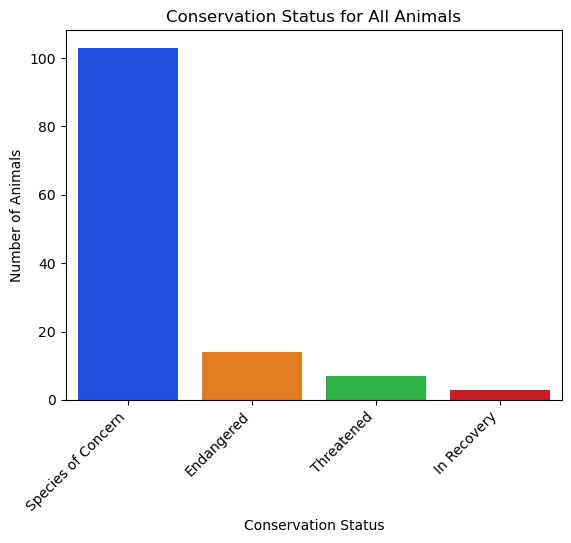

<Figure size 640x480 with 0 Axes>

In [37]:
sns.countplot(x = animal_data_endangered['conservation_status'], data = animal_data_endangered, palette = 'bright')
plt.title('Conservation Status for All Animals')
plt.xlabel('Conservation Status')
plt.ylabel('Number of Animals')
plt.xticks(rotation = 45, ha = 'right')

plt.show()
plt.clf()

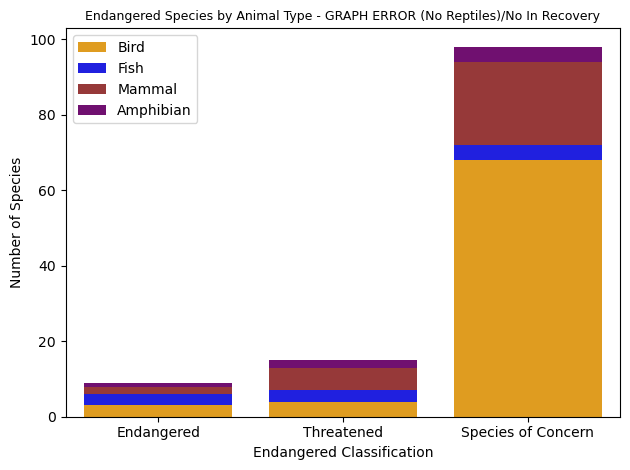

<Figure size 640x480 with 0 Axes>

In [38]:
animal_category = animal_data_endangered[animal_data_endangered.category == 'Bird']
animal_category = animal_category.groupby('conservation_status').count().sort_values(by = 'scientific_name').reset_index()
x_values = animal_category.conservation_status
y_values1 = animal_category.scientific_name
sns.barplot(x = x_values, y = y_values1, data = animal_category, color = 'orange', label = 'Bird')

animal_category = animal_data_endangered[animal_data_endangered.category == 'Fish']
animal_category = animal_category.groupby('conservation_status').count().sort_values(by = 'scientific_name').reset_index()
x_values = animal_category.conservation_status
y_values2 = animal_category.scientific_name
sns.barplot(x = x_values, y = y_values2, data = animal_category, bottom = y_values1, color = 'blue', label = 'Fish')

animal_category = animal_data_endangered[animal_data_endangered.category == 'Mammal']
animal_category = animal_category.groupby('conservation_status').count().sort_values(by = 'scientific_name').reset_index()
x_values = animal_category.conservation_status
y_values3 = animal_category.scientific_name
sns.barplot(x = x_values, y = y_values3, data = animal_category, bottom = y_values1 + y_values2, color = 'brown', label = 'Mammal')

animal_category = animal_data_endangered[animal_data_endangered.category == 'Amphibian']
animal_category = animal_category.groupby('conservation_status').count().sort_values(by = 'scientific_name').reset_index()
x_values = animal_category.conservation_status
y_values4 = animal_category.scientific_name
sns.barplot(x = x_values, y = y_values4, data = animal_category, bottom = y_values1 + y_values2 + y_values3, color = 'purple', label = 'Amphibian')

animal_category = animal_data_endangered[animal_data_endangered.category == 'Reptile']
animal_category = animal_category.groupby('conservation_status').count().sort_values(by = 'scientific_name').reset_index()
x_values = animal_category.conservation_status
y_values5 = animal_category.scientific_name
#sns.barplot(x = x_values, y = y_values5, data = animal_category, bottom = y_values1 + y_values2 + y_values3 + y_values4, color = 'green', label = 'Reptile')

plt.title('Endangered Species by Animal Type - GRAPH ERROR (No Reptiles)/No In Recovery', fontsize = 9)
plt.ylabel('Number of Species')
plt.xlabel('Endangered Classification')
plt.legend()
plt.tight_layout()

plt.show()
plt.clf()

In [39]:
# What percentage of each species is under some kind of conservation status?

In [40]:
animal_categories = ['Bird', 'Fish', 'Mammal', 'Amphibian', 'Reptile']

In [41]:
def endangered_percentage(animal_type):
    animal_category_data = animal_data[animal_data.category == animal_type]
    endangered_animal_data = animal_category_data[animal_category_data.conservation_status != 'No Intervention']
    animal_endangered_percentage = (len(endangered_animal_data)/len(animal_category_data)) * 100
    return round(animal_endangered_percentage, 1)

In [42]:
for i in animal_categories:
    if str(i) == 'Fish': 
        print(str(endangered_percentage(i)) + '% of '+ str(i) + ' are endagered to some some extent.')
    else:
        print(str(endangered_percentage(i)) + '% of '+ str(i) + 's are endagered to some some extent.')

15.4% of Birds are endagered to some some extent.
8.0% of Fish are endagered to some some extent.
17.0% of Mammals are endagered to some some extent.
8.9% of Amphibians are endagered to some some extent.
6.4% of Reptiles are endagered to some some extent.


In [43]:
# Which genus’ contain the largest number of endangered species?

In [45]:
endangered_genus = animal_data[animal_data.conservation_status != 'No Intervention']
endangered_genus_count = endangered_genus.groupby('animal_genus')['scientific_name'].count().sort_values().reset_index()

Text(0, 0.5, 'Number of Endangered Species')

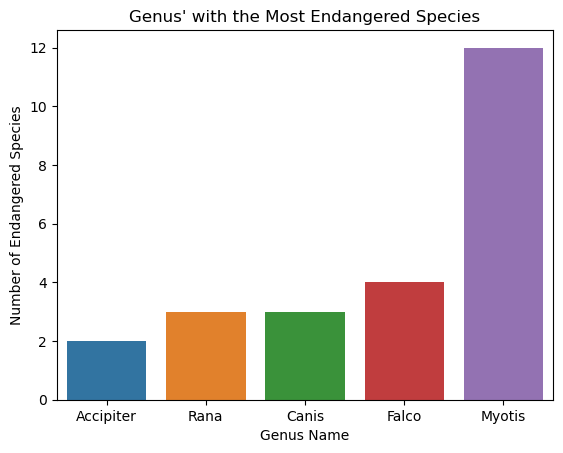

In [46]:
x_values = endangered_genus_count['animal_genus'][-5:]
y_values = endangered_genus_count ['scientific_name'][-5:]

sns.barplot(x = x_values, y = y_values, data = endangered_genus_count)
plt.title('Genus\' with the Most Endangered Species')
plt.xlabel('Genus Name')
plt.ylabel('Number of Endangered Species')

In [ ]:
# Create a function that returns highly endangered species (Threatened or Endangered) given genus name.

In [ ]:
def most_endagenered_species(genus_name):
    endangered_genus_name = animal_data[animal_data.animal_genus == genus_name]
    endangered_genus_status = endangered_genus_name[(endangered_genus_name.conservation_status == 'Threatened') | (endangered_genus_name.conservation_status == 'Endangered')].sort_values(by = 'conservation_status', ascending= True).reset_index()
    endangered_genus_names = endangered_genus_status['scientific_name']
    endangered_genus_status_subset = endangered_genus_status[['animal_genus','scientific_name', 'common_names', 'conservation_status']]
    if len(endangered_genus_names) >= 3:
        print('The most endangered species for the genus ' + str(genus_name) + ' are ' + str(endangered_genus_names[0]) + ', ' + str(endangered_genus_names[1]) + ', and ' + str(endangered_genus_names[2] + '.'))
    elif len(endangered_genus_names) >= 2:
        print('The most endangered species for the genus ' + str(genus_name) + ' are the ' + str(endangered_genus_names[0]) + ' and ' + str(endangered_genus_names[1]) + '.')
    elif len(endangered_genus_names) >= 1:
        print('The most endangered species for ' + str(genus_name) + ' is ' + str(genus_name[0]) + '.')
    else:
        print('There are no highly endangered species for the ' + str(genus_name) + ' genus.')
    print('---------------------------------------------------------------------------------------')
    print(endangered_genus_status_subset.head(5))

In [ ]:
# Test function

In [ ]:
most_endagenered_species('Canis')

In [ ]:
# Create a function that compares the most highly endangered species (Threatened or Endangered) given an animal type.

In [ ]:
def most_endagered_species_animal_type(animal_type):
    endangered_category_name = animal_data[animal_data.category == animal_type]
    endangered_category_status = endangered_category_name[(endangered_category_name.conservation_status == 'Threatened') | (endangered_category_name.conservation_status == 'Endangered')].sort_values(by = 'conservation_status', ascending= True).reset_index()
    endangered_category_names = endangered_category_status['scientific_name']
    endangered_category_status_subset = endangered_category_status[['scientific_name', 'common_names', 'conservation_status']]
    if len(endangered_category_names) >= 3:
        print('The most endangered species for ' + str(animal_type) + 's are the ' + str(endangered_category_names[0]) + ', ' + str(endangered_category_names[1]) + ', and ' + str(endangered_category_names[2] + '.'))
    elif len(endangered_category_names) >= 2:
        print('The most endangered species for ' + str(animal_type) + 's are the ' + str(endangered_category_names[0]) + ' and the ' + str(endangered_category_names[1]) + '.')
    elif len(endangered_category_names) >= 1:
        print('The most endangered species for ' + str(animal_type) + ' is ' + str(endangered_category_names[0]) + '.')
    else:
        print('There are no highly endangered species for the ' + str(animal_type) + ' animal type.')
    
    print('---------------------------------------------------------------------------------------')
    print(endangered_category_status_subset.head(5))
    print('')
    print('')
    print('')
    print('')

In [ ]:
# Test Function

In [ ]:
for i in animal_categories:
    most_endagered_species_animal_type(i)

In [ ]:
# Are certain types of species more likely to be endangered?

In [ ]:
animal_data['is_protected'] = animal_data.conservation_status == 'No Intervention'

In [ ]:
category_counts = animal_data.groupby(['category', 'is_protected']).scientific_name.nunique().reset_index().pivot(columns='is_protected', index='category', values='scientific_name').reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']
category_counts['percent_protected'] = (category_counts.protected) / (category_counts.protected + category_counts.not_protected) *100
print(category_counts)

In [ ]:
contingency_mammals_birds = [[30, 146], [75, 413]]
chi2_contingency(contingency_mammal_birds)

In [ ]:
contingency_mammals_reptiles = [[30, 146], [5, 73]]
chi2_contingency(contingency_mammals_reptiles)

In [ ]:
print('Since the above p-value of .038 falls below the 0.5 threshold, it can be said that mammals have a statistically higher rate of needed protection when compared to reptiles. Thus, some species are more likely to be endagered than others. ')